In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get current working directory
current_dir = os.getcwd()

# Navigate to data folder
data_dir = os.path.join(current_dir, "data")

# Read CSV file
df = pd.read_csv(os.path.join(data_dir, "faers_asthma.csv"), sep=",")


In [2]:
print(df.head)

<bound method NDFrame.head of        Case ID Suspect Product Names   Suspect Product Active Ingredients  \
0      4974950           A-Methapred  Methylprednisolone Sodium Succinate   
1      4974946           A-Methapred  Methylprednisolone Sodium Succinate   
2      4652544           A-Methapred  Methylprednisolone Sodium Succinate   
3      4656790           A-Methapred  Methylprednisolone Sodium Succinate   
4      4610124           A-Methapred  Methylprednisolone Sodium Succinate   
...        ...                   ...                                  ...   
92319  4230505                     -                       Nitrofurantoin   
92320  4236734                     -                           Gentamicin   
92321  4235917                     -                              Aspirin   
92322  4234961                     -               Gold Sodium Thiomalate   
92323  4227900                     -                              Aspirin   

      Reason for Use                         

In [3]:
# Count the number of missing or "Not Specified" values in the Patient Age column
num_missing_age = df['Patient Age'].isnull().sum() + (df['Patient Age'] == 'Not Specified').sum()

print(f"Number of missing or 'Not Specified' values in the Patient Age column: {num_missing_age}")


Number of missing or 'Not Specified' values in the Patient Age column: 31174


In [4]:
# Count the number of missing or "Not Specified" values in the Patient Weight column
num_missing_age = df['Patient Weight'].isnull().sum() + (df['Patient Weight'] == 'Not Specified').sum()

print(f"Number of missing or 'Not Specified' values in the Patient Weight column: {num_missing_age}")


Number of missing or 'Not Specified' values in the Patient Weight column: 70933


In [5]:
# Count the number of missing or "Not Specified" values in each column
missing_counts = df.isnull().sum() + (df == 'Not Specified').sum()

print("Missing value counts:")
print(missing_counts)


Missing value counts:
Case ID                                   0
Suspect Product Names                     0
Suspect Product Active Ingredients        0
Reason for Use                            0
Reactions                                 0
Serious                                   0
Outcomes                                  0
Sex                                    7879
Event Date                                0
Latest FDA Received Date                  0
Case Priority                             0
Patient Age                           31174
Patient Weight                        70933
Sender                                    0
Reporter Type                          3170
Report Source                         68484
Concomitant Product Names                 2
Latest Manufacturer Received Date         0
Initial FDA Received Date                 0
Country where Event occurred          22718
Reported to Manufacturer?             92022
Manufacturer Control Number               0
Literature

In [6]:
# Before making any changes to the variables - what does the distribution look like?
# select the columns of interest
cols_of_interest = ['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients',
                    'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
                    'Reporter Type', 'Report Source', 'Concomitant Product Names',
                    'Country where Event occurred', 'Outcomes', 'Reported to Manufacturer?']

# get basic descriptive statistics for the numeric columns
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())


# get basic descriptive statistics for the categorical columns
categorical_cols = list(set(cols_of_interest) - set(numeric_cols))
for col in categorical_cols:
    print(df[col].value_counts())

          Patient Age Patient Weight
count           92324          92324
unique           1124           2801
top     Not Specified  Not Specified
freq            31174          70933
Not Specified                                                       68484
Health Professional                                                 13816
Consumer                                                             4319
Health Professional ,Foreign                                         1347
Health Professional ,Study                                            516
                                                                    ...  
Company Representative ,Health Professional ,Distributor,Foreign        1
Company Representative ,Study,Foreign                                   1
User Facility ,Health Professional ,Distributor                         1
User Facility ,Health Professional ,Literature                          1
Consumer,Literature                                                     1
N

In [7]:
#Create Patient Age column to be only numeric
df['Patient Age'] = df['Patient Age'].str.extract('(\d+)').astype(float)



In [8]:
#Create Patient Weight column to be only numeric 
df['Patient Weight'] = df['Patient Weight'].str.extract('(\d+)').astype(float)


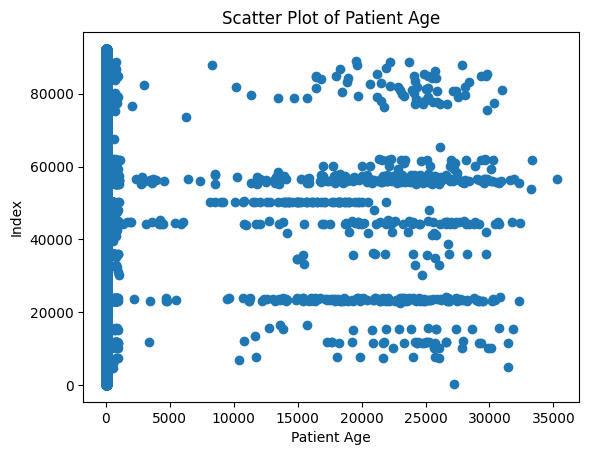

In [9]:
#Visualizing patient age


# create a scatter plot of patient age
plt.scatter(df['Patient Age'], range(len(df)))
plt.xlabel('Patient Age')
plt.ylabel('Index')
plt.title('Scatter Plot of Patient Age')
plt.show()


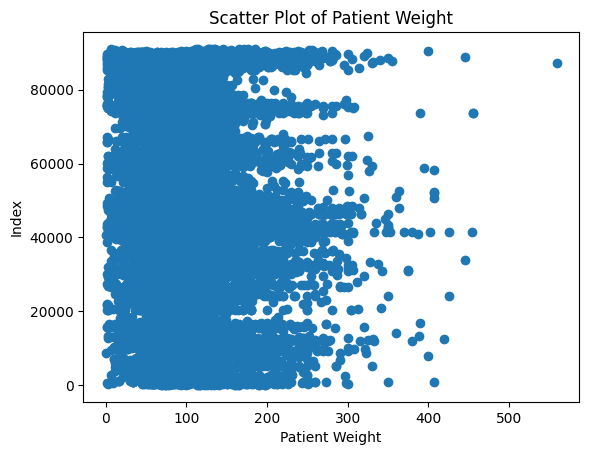

In [10]:
#visualizing patient weight

# create a scatter plot of patient weight
plt.scatter(df['Patient Weight'], range(len(df)))
plt.xlabel('Patient Weight')
plt.ylabel('Index') 
plt.title('Scatter Plot of Patient Weight')
plt.show()


In [11]:
# get basic descriptive statistics for the numeric columns - After making them nominal variables
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())


        Patient Age  Patient Weight
count  61150.000000    21391.000000
mean     271.105004       94.413211
std     2212.847300       50.444914
min        0.000000        0.000000
25%       39.000000       64.000000
50%       54.000000       81.000000
75%       66.000000      111.000000
max    35248.000000      559.000000


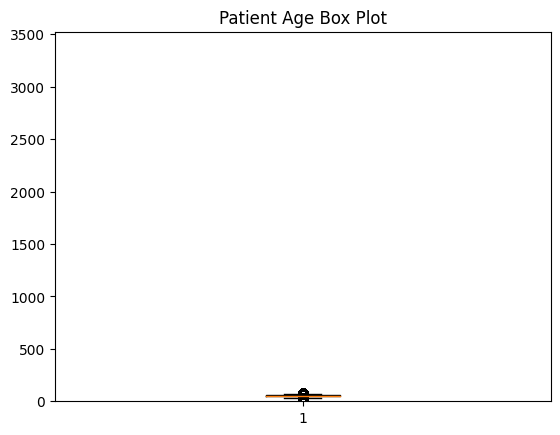

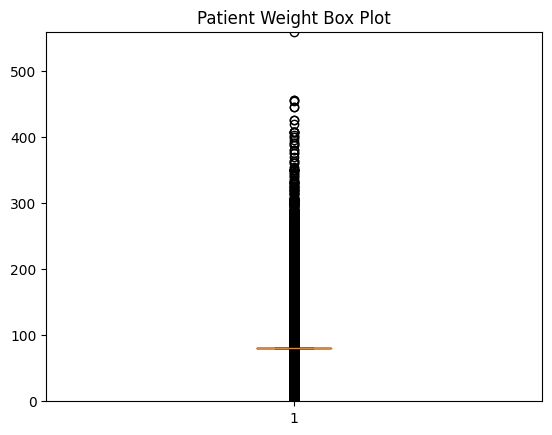

In [37]:
##median, quartiles, and any outliers before removing outliers - is There is an issue with large amounts of patients' ages being incorrect


# Create box plot for Patient Age
plt.boxplot(df['Patient Age'])
plt.title('Patient Age Box Plot')
plt.ylim(bottom=0
         , top=3525)
plt.show()

# Create box plot for Patient Weight
plt.boxplot(df['Patient Weight'])
plt.title('Patient Weight Box Plot')
plt.ylim(bottom=0, top=559)
plt.show()


In [13]:

# Create a new column for age range
df['Age Range'] = pd.cut(df['Patient Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])


In [14]:
# Count number of cases for each age range
age_counts = df['Age Range'].value_counts()
print(age_counts)


50-60     12850
60-70     11876
40-50      9580
70-80      6875
30-40      6570
20-30      3877
10-20      3212
0-10       2827
80-90      2103
90-100      174
Name: Age Range, dtype: int64


In [15]:
# Group the DataFrame by Age Range and count the number of rows in each group
age_range_counts = df.groupby('Age Range').size().reset_index(name='Age Range Count')

print(age_range_counts)


  Age Range  Age Range Count
0      0-10             2827
1     10-20             3212
2     20-30             3877
3     30-40             6570
4     40-50             9580
5     50-60            12850
6     60-70            11876
7     70-80             6875
8     80-90             2103
9    90-100              174


In [16]:
# Group the DataFrame by Age Range and count the number of rows in each group
age_range_counts = df.groupby('Age Range').size().reset_index(name='Age Range Count')

# Join the age_range_counts DataFrame to the original DataFrame
df = df.merge(age_range_counts, on='Age Range', how='left')

In [17]:

# Create a new column for weight ranges
df['Weight Range'] = pd.cut(df['Patient Weight'], bins=[0, 100, 200, 300, 400, 500, 600], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600'])


In [18]:
# Count number of cases for each weight range
weight_counts = df['Weight Range'].value_counts()
print(weight_counts)


0-100      14792
100-200     5647
200-300      861
300-400       74
400-500       14
500-600        1
Name: Weight Range, dtype: int64


In [19]:
# Group the DataFrame by Weight Range and count the number of rows in each group
weight_range_counts = df.groupby('Weight Range').size().reset_index(name='Weight Range Count')

print(weight_range_counts)


  Weight Range  Weight Range Count
0        0-100               14792
1      100-200                5647
2      200-300                 861
3      300-400                  74
4      400-500                  14
5      500-600                   1


In [20]:
# Group the DataFrame by Age Range and count the number of rows in each group
weight_range_counts = df.groupby('Weight Range').size().reset_index(name='Weight Range Count')

# Join the age_range_counts DataFrame to the original DataFrame
df = df.merge(weight_range_counts, on='Weight Range', how='left')



In [21]:
# replace missing values with median for Patient Age
df[['Patient Age']] = df[['Patient Age']].fillna(df[['Patient Age']].median())

# calculate quartiles and IQR for Patient Age and Patient Weight
q1_age, q3_age = np.percentile(df['Patient Age'], [25, 75])
iqr_age = q3_age - q1_age

# replace outliers with median
df.loc[df['Patient Age'] > q3_age + 1.5*iqr_age, 'Patient Age'] = df['Patient Age'].median()



In [22]:
# get basic descriptive statistics for the numeric columns - After removing outliers
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())

        Patient Age  Patient Weight
count  92324.000000    21391.000000
mean      50.778920       94.413211
std       15.088449       50.444914
min        0.000000        0.000000
25%       48.000000       64.000000
50%       54.000000       81.000000
75%       57.000000      111.000000
max       78.000000      559.000000


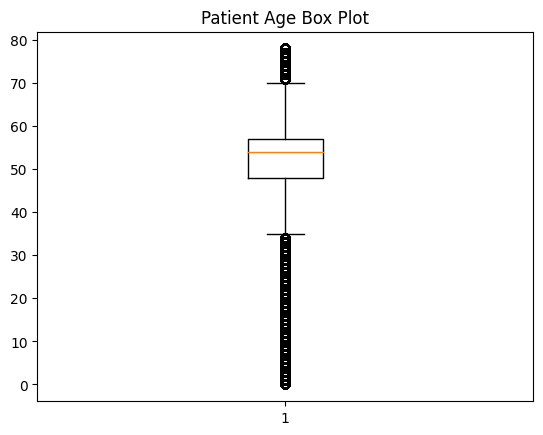

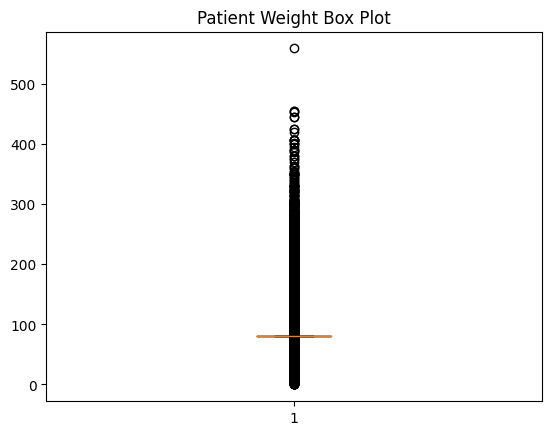

In [38]:
#median, quartiles, and any outliers after removing outliers

# Create box plot for Patient Age
plt.boxplot(df['Patient Age'])
plt.title('Patient Age Box Plot')
plt.show()

# Create box plot for Patient Weight
plt.boxplot(df['Patient Weight'])
plt.title('Patient Weight Box Plot')
plt.show()


In [24]:
median_age = df['Patient Age'].median()
df['Patient Age'].fillna(median_age, inplace=True)

In [25]:
median_weight = df['Patient Weight'].median()
df['Patient Weight'].fillna(median_weight, inplace=True)

In [26]:
print(df.columns)

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag', 'Age Range', 'Age Range Count', 'Weight Range',
       'Weight Range Count'],
      dtype='object')


In [27]:

# Replace values with 1 and 0 for 'Serious' variable
df['Serious'] = df['Serious'].replace({'Serious': 1, 'Non-Serious': 0})

# Convert variable to categorical variable
df['Serious'] = df['Serious'].astype('category')

df['Serious']

0        0
1        1
2        1
3        0
4        1
        ..
92319    1
92320    1
92321    1
92322    1
92323    1
Name: Serious, Length: 92324, dtype: category
Categories (2, int64): [0, 1]

In [28]:

# Replace values with 1 and 0 for 'Case Priority' variable
df['Case Priority'] = df['Serious'].replace({'Expedited': 1, 'Non-Expedited': 0, 'Direct': 2, '30-DAY': 3, '5-Day': 4, 'BSR': 5})

# Convert variable to categorical variable
df['Case Priority'] = df['Case Priority'].astype('category')

df['Case Priority']

0        0
1        1
2        1
3        0
4        1
        ..
92319    1
92320    1
92321    1
92322    1
92323    1
Name: Case Priority, Length: 92324, dtype: category
Categories (2, int64): [0, 1]

In [29]:

# Replace values with 1 and 0 for 'Sex' variable
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 2, 'Direct': 2, 'Not Specified': 0})

# Convert variable to categorical variable
df['Sex'] = df['Case Priority'].astype('category')

df['Sex']

0        0
1        1
2        1
3        0
4        1
        ..
92319    1
92320    1
92321    1
92322    1
92323    1
Name: Sex, Length: 92324, dtype: category
Categories (2, int64): [0, 1]

In [30]:

# Replace values with 1 and 0 for 'Reported to Manufacturer?' variable
df['Reported to Manufacturer?'] = df['Reported to Manufacturer?'].replace({'Y': 1, 'Not Specified': 0})

# Convert variable to categorical variable
df['Reported to Manufacturer?'] = df['Reported to Manufacturer?'].astype('category')

df['Reported to Manufacturer?']

0        0
1        0
2        0
3        0
4        0
        ..
92319    0
92320    0
92321    0
92322    0
92323    0
Name: Reported to Manufacturer?, Length: 92324, dtype: category
Categories (2, int64): [0, 1]

In [31]:
# Replace values with 1,2, and 0 for 'Reporter Type' variable
df['Reporter Type'] = df['Reporter Type'].replace({'Consumer': 1, 'Healthcare Professional': 2, 'Not Specified': 0})

# Convert variable to categorical variable
df['Reporter Type'] = df['Reporter Type'].astype('category')

df['Reporter Type']

0        1
1        1
2        1
3        1
4        2
        ..
92319    2
92320    2
92321    2
92322    2
92323    2
Name: Reporter Type, Length: 92324, dtype: category
Categories (3, int64): [0, 1, 2]

In [32]:
cleaned_data = df[['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients', 'Reactions', 'Serious', 'Sex',
                   'Patient Age','Age Range', 'Age Range Count', 'Patient Weight','Weight Range', 'Weight Range Count','Reporter Type','Report Source', 'Concomitant Product Names','Country where Event occurred', 'Outcomes','Reported to Manufacturer?',]]
print(cleaned_data)


      Suspect Product Names Reason for Use  \
0               A-Methapred              -   
1               A-Methapred              -   
2               A-Methapred              -   
3               A-Methapred              -   
4               A-Methapred              -   
...                     ...            ...   
92319                     -              -   
92320                     -              -   
92321                     -              -   
92322                     -              -   
92323                     -              -   

        Suspect Product Active Ingredients  \
0      Methylprednisolone Sodium Succinate   
1      Methylprednisolone Sodium Succinate   
2      Methylprednisolone Sodium Succinate   
3      Methylprednisolone Sodium Succinate   
4      Methylprednisolone Sodium Succinate   
...                                    ...   
92319                       Nitrofurantoin   
92320                           Gentamicin   
92321                            

In [33]:
#cleaned_data.to_csv('cleaned_data.csv', index=False)

In [34]:

# select the columns of interest
cols_of_interest = ['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients',
                    'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
                    'Reporter Type', 'Report Source', 'Concomitant Product Names',
                    'Country where Event occurred', 'Outcomes', 'Reported to Manufacturer?']

# get basic descriptive statistics for the numeric columns
numeric_cols = ['Patient Age', 'Patient Weight']
print(cleaned_data[numeric_cols].describe())


# get basic descriptive statistics for the categorical columns
categorical_cols = list(set(cols_of_interest) - set(numeric_cols))
for col in categorical_cols:
    print(cleaned_data[col].value_counts())


        Patient Age  Patient Weight
count  92324.000000    92324.000000
mean      50.778920       84.107773
std       15.088449       24.931861
min        0.000000        0.000000
25%       48.000000       81.000000
50%       54.000000       81.000000
75%       57.000000       81.000000
max       78.000000      559.000000
Not Specified                                                       68484
Health Professional                                                 13816
Consumer                                                             4319
Health Professional ,Foreign                                         1347
Health Professional ,Study                                            516
                                                                    ...  
Company Representative ,Health Professional ,Distributor,Foreign        1
Company Representative ,Study,Foreign                                   1
User Facility ,Health Professional ,Distributor                         1
User Facil

In [35]:
print(cleaned_data)

      Suspect Product Names Reason for Use  \
0               A-Methapred              -   
1               A-Methapred              -   
2               A-Methapred              -   
3               A-Methapred              -   
4               A-Methapred              -   
...                     ...            ...   
92319                     -              -   
92320                     -              -   
92321                     -              -   
92322                     -              -   
92323                     -              -   

        Suspect Product Active Ingredients  \
0      Methylprednisolone Sodium Succinate   
1      Methylprednisolone Sodium Succinate   
2      Methylprednisolone Sodium Succinate   
3      Methylprednisolone Sodium Succinate   
4      Methylprednisolone Sodium Succinate   
...                                    ...   
92319                       Nitrofurantoin   
92320                           Gentamicin   
92321                            

In [36]:
cleaned_data.describe()


,Patient Age,Age Range Count,Patient Weight,Weight Range Count
count,92324.000000,59944.000000,92324.000000,21389.000000
mean,50.778920,8777.553850,84.107773,11755.522325
std,15.088449,3629.098374,24.931861,4644.941138
min,0.000000,174.000000,0.000000,1.000000
25%,48.000000,6570.000000,81.000000,5647.000000
50%,54.000000,9580.000000,81.000000,14792.000000
75%,57.000000,11876.000000,81.000000,14792.000000
max,78.000000,12850.000000,559.000000,14792.000000
